In [1]:
import sys
import seaborn as sns
sys.path.append("..")
%matplotlib inline
sns.set(rc={'image.cmap': 'Purples_r'})

##Strategies
The strategy object describes the behaviour of an agent, given its vocabulary. The main algorithms that vary among strategies are:
* how to choose a link (meaning-word) to enact, 
* how to guess a meaning from a word
* how to update the vocabulary

In [2]:
import lib.ngstrat as ngstrat
import lib.ngvoc as ngvoc

Let's create a strategy. We will also need two vocabularies to work on (speaker and hearer). (more info on other strategy types: Design_newStrategy.ipynb)

In [3]:
voc_cfg = {
    'voc_type':'sparse_matrix',
    'M':5,
    'W':10
    }

nlink = 0

voctest_speaker = ngvoc.Vocabulary(**voc_cfg)
for i in range(0, nlink):
    voctest_speaker.add(random.randint(0,M-1), random.randint(0,W-1), 1)
    
voctest_hearer=ngvoc.Vocabulary(**voc_cfg)
for i in range(0, nlink):
    voctest_hearer.add(random.randint(0,M-1), random.randint(0,W-1), 1)

print("Speaker:")
print(voctest_speaker)
print(" ")
print("Hearer:")
print(voctest_hearer)

Speaker:
                          Words
        [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Meanings [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]

 
Hearer:
                          Words
        [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Meanings [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]



In [4]:
strat_cfg={"strat_type":"naive",'voc_update':'Adaptive'}

teststrat=ngstrat.Strategy(**strat_cfg)
teststrat

Now that we have a strategy, we can test the different functions. Exec

!! Vocabularies are modified, but this way you can observe progressive growth of the number of links !!

In [5]:
memory_s=teststrat.init_memory(voctest_speaker) #Not important for the naive strategy, here it simply is {}
memory_h=teststrat.init_memory(voctest_hearer)

print("Initial vocabulary of the speaker:")
print(voctest_speaker)
print(" ")
print("Initial vocabulary of the hearer:")
print(voctest_hearer)
print(" ")

mw=teststrat.pick_mw(voctest_speaker,memory_s)
ms=mw[0]
print("Meaning chosen by speaker:")
print(ms)
print (" ")

w=mw[1]
print("Word uttered by speaker:")
print(w)
print (" ")

mh=teststrat.guess_m(w,voctest_hearer,memory_h)
print("Meaning interpreted by hearer:")
print(mh)
print (" ")

if (ms==mh):
    print("Success!")
else:
    print("Failure!")
print(" ")

teststrat.update_speaker(ms,w,mh,voctest_speaker,memory_s)
teststrat.update_hearer(ms,w,mh,voctest_hearer,memory_h)

print("Updated vocabulary of the speaker:")
print(voctest_speaker)
print(" ")
print("Updated vocabulary of the hearer:")
print(voctest_hearer)

Initial vocabulary of the speaker:
                          Words
        [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Meanings [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]

 
Initial vocabulary of the hearer:
                          Words
        [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Meanings [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]

 
Meaning chosen by speaker:
2
 
Word uttered by speaker:
9
 
Meaning interpreted by hearer:
3
 
Failure!
 
Updated vocabulary of the speaker:
                          Words
        [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Meanings [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
         [ 0.  0.  0.  



Here you can modify by hand the 2 vocabularies before re-executing the code:

In [6]:
#voctest_speaker.add(0,0,1)
#voctest_speaker.add(0,0,0)

#voctest_hearer.add(0,0,1)
#voctest_hearer.add(0,0,0)

print("Speaker:")
print(voctest_speaker)
print(" ")
print("Hearer:")
print(voctest_hearer)

Speaker:
                          Words
        [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Meanings [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]

 
Hearer:
                          Words
        [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Meanings [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]



Approximation of the probability density of the different procedures of the strategy:

                          Words
        [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Meanings [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]



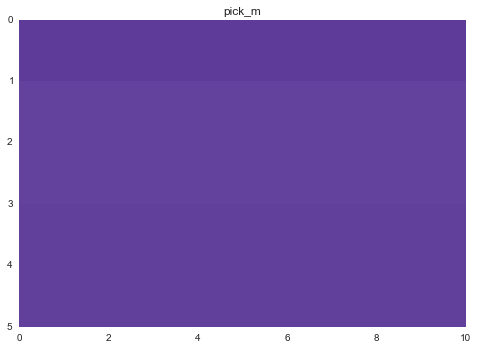

In [7]:
voctest_speaker.visual()
teststrat.visual(voc=voctest_speaker,mem=memory_s,vtype="pick_m",iterr=500)

                          Words
        [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Meanings [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]



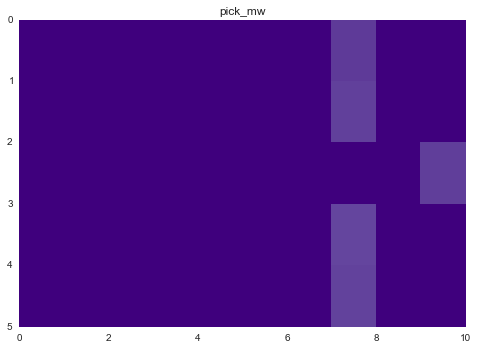

In [8]:
voctest_speaker.visual()
teststrat.visual(voc=voctest_speaker,mem=memory_s,vtype="pick_mw",iterr=500)

                          Words
        [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Meanings [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]



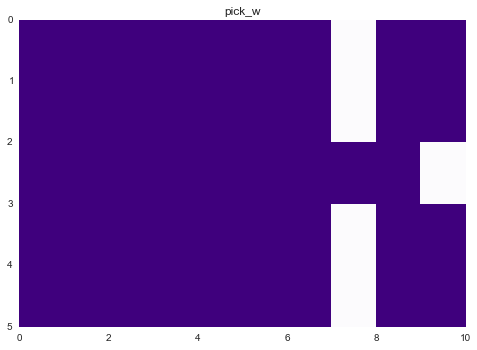

In [9]:
voctest_speaker.visual()
teststrat.visual(voc=voctest_speaker,mem=memory_s,vtype="pick_w",iterr=500)

                          Words
        [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Meanings [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
         [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]



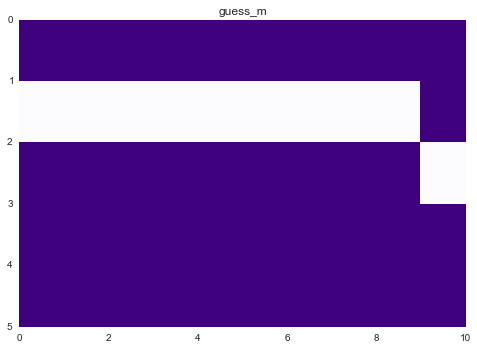

In [10]:
voctest_hearer.visual()
teststrat.visual(voc=voctest_hearer,mem=memory_h,vtype="guess_m",iterr=500)